In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

# Hands-on Activity 8.4: Sampling Estimates of Variance

## Objectives

- To use the law of large numbers to estimate variances 

## Estimating the variance
We now want to estimate the variance:
$$
V = \mathbb{V}[g(X)],
$$
using some sort of sampling average.
Notice that:
$$
V = \mathbb{V}[g(X)] = \mathbb{E}[g^2(X)] - \left(\mathbb{E}[g(X)]\right)^2.
$$
We already know how to estimate the last term, see definition of $\bar{I}_N$ in the previous subsection.
To approximate the other term, consider the random variables $g^2(X_1),g^2(X_2),\dots$.
These are independent and identically distributed so by the law of large numbers we get that:
$$
\frac{g^2(X_1)+\dots+g^2(X_N)}{N}\rightarrow \mathbb{E}[g^2(X)],\;\text{a.s.}
$$
Putting everything together, we get that:
$$
\bar{V}_N = \frac{1}{N}\sum_{i=1}^Ng^2(X_i) - \bar{I}_N^2\rightarrow V\;\text{a.s.}
$$

### Example: 1D variance

Let's try it out with a test function in 1D (Example 3.4 of Robert & Casella (2004)).
Assume that $X\sim\mathcal{U}([0,1])$ and pick:
$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$
The correct value for the variance is:
$$
\mathbb{V}[g(X)] \approx 1.093.
$$

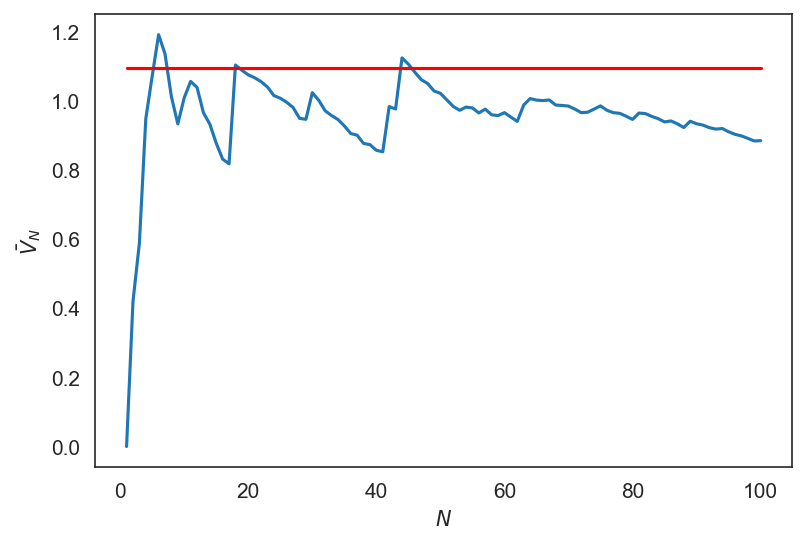

In [2]:
# Define the function
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Number of samples to take
N = 100
# Generate samples from X
x_samples = np.random.rand(N)
# Get the corresponding Y's
y_samples = g(x_samples)
# Evaluate the sample average E[g(X)] for all sample sizes
I_running = np.cumsum(y_samples) / np.arange(1, N + 1)
# Evaluate the sample average for E[g^2(X)] for all sample sizes
I2_running = np.cumsum(y_samples ** 2) / np.arange(1, N + 1)
# Build the sample average for V[g(X)]
V_running = I2_running - I_running ** 2

# Plot a running estimate of the variance
fig, ax = plt.subplots(dpi=150)
ax.plot(np.arange(1, N+1), V_running)
ax.plot(np.arange(1, N+1), [1.093] * N, color='r')
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{V}_N$');

+ Increase ``N`` until you get an answer that is close enough to the correct answer (the red line).
+ Reduce ``N`` back to a small number, say 1,000. Run the code 2-3 times to observe that every time you get a slightly different answer...